In [1]:
import os
import sys
import numpy as np
import json
import matplotlib.pyplot as plt
import mdtraj
import urllib.request
import yaml
import pprint
sys.path.insert(1, '../BuildDatabank/')
from databankLibrary import lipids_dict, molecule_numbers_dict

In [2]:
DvsHYD = []
Ds = []
Ts = []
HYD = []
DOI = []
FFSOL = []
FF = []
lipidfrac = {}
molfrac = {}
for lipid in lipids_dict:
    lipidfrac[lipid] = []
for molecule in molecule_numbers_dict:
    molfrac[molecule] = []

    
for subdir, dirs, files in os.walk(r'../../Data/WATERdiffusion/'):
    for filename in files:
        filepath = subdir + os.sep + filename
        if filepath.endswith("README.yaml"):
            READMEfilepath = subdir + '/README.yaml'
            print(subdir)
            waterDIFFUSIONfilepath = subdir + '/WATERlateralMSD.xvg'
            with open(READMEfilepath) as yaml_file:
                readme = yaml.load(yaml_file, Loader=yaml.FullLoader)
                
                Nlipids = 0
                for lipid in lipids_dict:
                    if np.sum(readme.get('N' + lipid)):
                        Nlipids += np.sum(readme.get('N' + lipid))
                
                D = float(os.popen('grep D ' + waterDIFFUSIONfilepath + " | grep = | awk '{print $5}'").read())
                T = float(readme.get('TEMPERATURE'))
                
                for lipid in lipids_dict:
                    if readme.get('N' + lipid):
                        lipidfrac[lipid].append(np.sum(readme.get('N' + lipid)) / Nlipids)
                    else:
                        lipidfrac[lipid].append(0)

                for molecule in molecule_numbers_dict:
                    if readme.get(molecule):
                        #print(np.sum(readme.get(molecule)),readme.get('NSOL'))
                        molfrac[molecule].append(np.sum(readme.get(molecule)) / readme.get('NSOL'))
                    else:
                        molfrac[molecule].append(0)
                    
                Ts.append(T)
                Ds.append(D)
                HYD.append(readme.get('NSOL')/Nlipids)
                DOI.append(readme.get('DOI'))
                FFSOL.append(readme.get('FFSOL'))
                FF.append(readme.get('FF'))

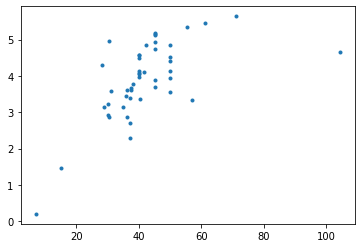

In [226]:
plt.plot(HYD,Ds,".")

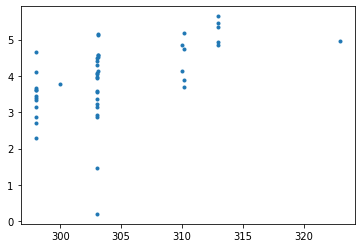

In [227]:
plt.plot(Ts,Ds,".")

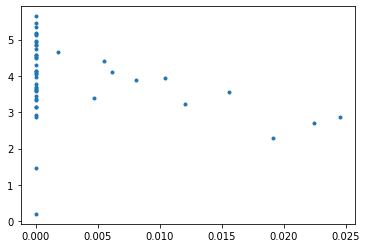

In [228]:
plt.plot(molfrac['NCAL'],Ds,".")

In [55]:
DvsHYD = [HYD,Ds]

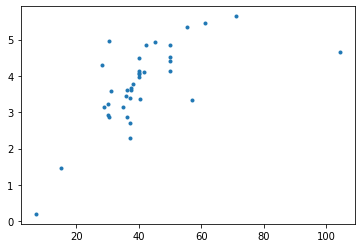

In [58]:
plt.plot(DvsHYD[0],DvsHYD[1],".")

40.0 4.5731 None CHARMM36 10.5281/zenodo.209362
45.0 4.9253 None CHARMM36 10.5281/zenodo.4040423
37.294 2.7083 None CHARMM36 10.5281/zenodo.3483785
40.3984375 3.3532 SPC Berger 10.5281/zenodo.4537207
28.1 4.3036 TIP3P CHARMM36 10.5281/zenodo.14068
36.228 2.8559 None CHARMM36 10.5281/zenodo.3483793
35.95 3.4487 None CHARMM36 10.5281/zenodo.2542164
37.3 3.4009 None CHARMM36 10.5281/zenodo.2542176
50.0 3.9534 None CHARMM36 10.5281/zenodo.35160
41.596 4.1111 None CHARMM36 10.5281/zenodo.3483789
30.055555555555557 3.2152 None CHARMM36 10.5281/zenodo.32570
50.0 4.1224 SPC gromos-ckp 10.5281/zenodo.3247435
28.958333333333332 3.1398 None CHARMM36 10.5281/zenodo.4750862
15.0 1.4669 None CHARMM36 10.5281/zenodo.4740115
104.43 4.671 TIP3P CHARMM36 10.5281/zenodo.4005515
31.13888888888889 3.5732 None CHARMM36 10.5281/zenodo.13944
50.0 4.5294 TIP3P CHARMM36 10.5281/zenodo.4651415
55.31944444444444 5.3511 TIP3P CHARMM36 10.5281/zenodo.1288297
36.316 3.6223 None CHARMM36 10.5281/zenodo.3483787
40.0 4

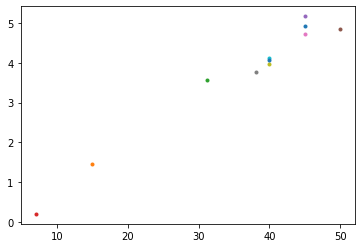

In [230]:
for i in range(len(HYD)):
    #print(lipidfrac['POPC'])
    print(HYD[i],Ds[i],FFSOL[i],FF[i],DOI[i])
    if FF[i] and 'CHARMM' in FF[i] and lipidfrac['POPC'][i] == 1:
        if molfrac['NCAL'][i] == 0 and molfrac['NSOD'][i] == 0:
            #print(HYD[i],molfrac['NCAL'][i],lipidfrac['POPG'][i],Ds[i])
            plt.plot(HYD[i],Ds[i],".")

POPC -0.21494300750877865
POPG 0.4376566919468629
POPS 0.0873754956082805
POPE nan
DMPC nan
DPPC nan
POPI nan
SAPI nan
SLPI nan
CHOL -1.0
DHMDMAB -0.9793627675629138


/home/osollila/.local/lib/python3.6/site-packages/numpy/lib/function_base.py:380: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis)
/home/osollila/.local/lib/python3.6/site-packages/numpy/core/_methods.py:163: RuntimeWarning: invalid value encountered in true_divide
  ret, rcount, out=ret, casting='unsafe', subok=False)
/home/osollila/.local/lib/python3.6/site-packages/numpy/lib/function_base.py:2551: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar)
/home/osollila/.local/lib/python3.6/site-packages/numpy/lib/function_base.py:2480: RuntimeWarning: divide by zero encountered in true_divide
  c *= np.true_divide(1, fact)
/home/osollila/.local/lib/python3.6/site-packages/numpy/lib/function_base.py:2480: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)


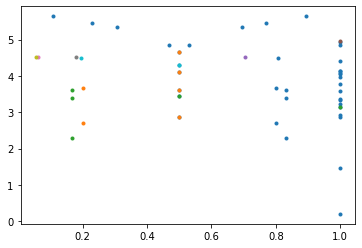

In [155]:
for lipid in lipids_dict:
    lipidFRACtmp = []
    DsTMP = []
    for i in range(len(Ds)):
        #print(lipidfrac[lipid][i],Ds[i])
        if lipidfrac[lipid][i] > 0:
            lipidFRACtmp.append(lipidfrac[lipid][i])
            DsTMP.append(Ds[i])
    #print(lipidFRACtmp,DsTMP)
    print(lipid,np.corrcoef(lipidFRACtmp,DsTMP)[0][1])
    plt.plot(lipidFRACtmp,DsTMP,".")

NPOPC -0.7503386069775629
NPOPG -0.20707322750919566
NPOPS 0.08465203816017629
NPOPE nan
NDMPC nan
NDPPC nan
NPOPI nan
NSAPI nan
NSLPI nan
NCHOL -1.0
NDHMDMAB -0.9981873649473775
NPOT -0.6035677723615638
NSOD -0.521522816664355
NCLA -0.7202875865925299
NCAL -0.8576956501511326


/home/osollila/.local/lib/python3.6/site-packages/numpy/lib/function_base.py:380: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis)
/home/osollila/.local/lib/python3.6/site-packages/numpy/core/_methods.py:163: RuntimeWarning: invalid value encountered in true_divide
  ret, rcount, out=ret, casting='unsafe', subok=False)
/home/osollila/.local/lib/python3.6/site-packages/numpy/lib/function_base.py:2551: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar)
/home/osollila/.local/lib/python3.6/site-packages/numpy/lib/function_base.py:2480: RuntimeWarning: divide by zero encountered in true_divide
  c *= np.true_divide(1, fact)
/home/osollila/.local/lib/python3.6/site-packages/numpy/lib/function_base.py:2480: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)


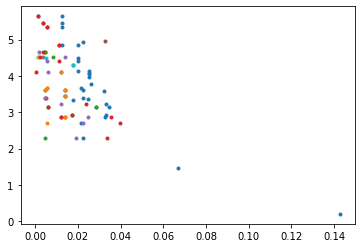

In [167]:
for molecule in molecule_numbers_dict:
    molFRACtmp = []
    DsTMP = []
    for i in range(len(Ds)):
        #print(lipidfrac[lipid][i],Ds[i])
        if molfrac[molecule][i] > 0:
            molFRACtmp.append(molfrac[molecule][i])
            DsTMP.append(Ds[i])
    #print(lipidFRACtmp,DsTMP)
    if molecule != 'NSOL':
        print(molecule,np.corrcoef(molFRACtmp,DsTMP)[0][1])
        #print(molFRACtmp,DsTMP)
        plt.plot(molFRACtmp,DsTMP,".")

In [132]:
print(np.corrcoef(lipidfrac['CHOL'],Ds))

[[1.         0.11832451]
 [0.11832451 1.        ]]


In [214]:
lipidfrac['POPC']

[1.0,
 0.8,
 1.0,
 0.5,
 0.5,
 0.5,
 0.8333333333333334,
 0.5,
 1.0,
 1.0,
 1.0,
 1.0,
 0.5,
 1.0,
 0.0,
 0.6944444444444444,
 0.5,
 0.8064516129032258,
 0.7692307692307693,
 0.8333333333333334,
 1.0,
 1.0,
 1.0,
 1.0,
 0.0,
 1.0,
 1.0,
 1.0,
 0.8,
 1.0,
 0.5319148936170213,
 1.0,
 0.8333333333333334,
 0.8928571428571429,
 1.0,
 0.0,
 1.0]

In [152]:
DsTMP

[[4.9253,
  2.7083,
  3.3532,
  4.3036,
  2.8559,
  3.4487,
  3.4009,
  4.1111,
  3.2152,
  4.1224,
  3.1398,
  1.4669,
  4.671,
  3.5732,
  4.5294,
  5.3511,
  3.6223,
  4.4873,
  5.4521,
  3.6084,
  0.2023,
  2.87,
  2.9331,
  4.8491,
  4.9509,
  4.4117,
  3.7809,
  3.3411,
  3.6622,
  3.9801,
  4.86,
  4.1329,
  2.2933,
  5.642,
  4.0635,
  3.154,
  4.0776],
 [4.9253,
  2.7083,
  3.3532,
  4.3036,
  2.8559,
  3.4487,
  3.4009,
  4.1111,
  3.2152,
  4.1224,
  3.1398,
  1.4669,
  4.671,
  3.5732,
  4.5294,
  5.3511,
  3.6223,
  4.4873,
  5.4521,
  3.6084,
  0.2023,
  2.87,
  2.9331,
  4.8491,
  4.9509,
  4.4117,
  3.7809,
  3.3411,
  3.6622,
  3.9801,
  4.86,
  4.1329,
  2.2933,
  5.642,
  4.0635,
  3.154,
  4.0776],
 [4.9253,
  2.7083,
  3.3532,
  4.3036,
  2.8559,
  3.4487,
  3.4009,
  4.1111,
  3.2152,
  4.1224,
  3.1398,
  1.4669,
  4.671,
  3.5732,
  4.5294,
  5.3511,
  3.6223,
  4.4873,
  5.4521,
  3.6084,
  0.2023,
  2.87,
  2.9331,
  4.8491,
  4.9509,
  4.4117,
  3.7809,
  3.3